In [37]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Processing
from sklearn.preprocessing import MinMaxScaler
#ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
#Model Eval
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report,precision_score, confusion_matrix, auc, roc_auc_score

In [32]:
#Loading Train Test Validate
trainvaldata=pd.read_csv('trainvaldata.csv', index_col=0, delimiter=',')
testdata=pd.read_csv('testdata.csv', index_col=0, delimiter=',')

In [33]:
#Use Train Val data to train
#Split the feature in Trainval
target=trainvaldata['Severity']
dropcol=['Severity']
feat=trainvaldata.drop(dropcol, axis=1)
feat.head()
target.head()

18136    0
12118    1
10692    1
10536    0
4441     0
Name: Severity, dtype: int64

In [34]:
#Split the feature in test
ytest=testdata['Severity']
dropcol=['Severity']
xtest=testdata.drop(dropcol, axis=1)
xtest.head()
ytest.head()

6766     1
1453     0
1192     1
17935    0
1002     1
Name: Severity, dtype: int64

In [35]:
#Normalization Using Maxmin scaler
scaler = MinMaxScaler()
scaledfeat = scaler.fit_transform(feat)
scaledfeat = pd.DataFrame(scaledfeat, columns=feat.columns)
scaledfeat.head()

,Description,Location Description,Arrest,Domestic,beatnum,Language,housingcrowdedpct,belowpovertypct,adultnojobpct,adultnohighschoolpct,under18above64pct,incomepercapita,hardshipindex,Temperature,Snowfall
0,0.495536,0.054348,0.0,0.0,0.511244,0.0,0.212903,0.494361,0.586538,0.267686,0.723684,0.112890,0.670103,0.344828,0.000000
1,0.098214,0.543478,1.0,1.0,0.465885,0.0,0.161290,0.522556,0.490385,0.219885,0.584211,0.139148,0.556701,0.000000,0.863517
2,0.258929,0.043478,1.0,0.0,0.424799,0.0,0.193548,0.488722,0.628205,0.256214,0.684211,0.189777,0.577320,0.000000,0.902887
3,0.366071,0.043478,0.0,0.0,0.424799,0.0,0.064516,0.684211,0.769231,0.304015,0.707895,0.137334,0.793814,0.000000,0.863517
4,0.303571,0.293478,1.0,0.0,0.092169,0.0,0.187097,0.253759,0.112179,0.235182,0.334211,0.294614,0.226804,1.000000,0.270341


In [12]:
###Split the data into train and validate
xtrain, xval, ytrain, yval=train_test_split(scaledfeat, target, test_size=0.15, random_state=5)

In [13]:
#Random Forest
rfclf= RandomForestClassifier(n_estimators=50, min_samples_split = 30,bootstrap = True, max_depth = 50, min_samples_leaf = 25, random_state=0)
# Model Training
rfclf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

========== RF Validation Result  ==========
Validation Accuracy    :  0.8670833333333333
ROC    :  0.8573331436396293
========== RF Cross Validation Result  ==========
5-fold cross validation Accuracy   :  0.8686245797790118
10-fold cross validation Accuracy  :  0.8756246287840348
5-fold cross AUC   :  0.8581339353649272
10-fold cross AUC  :  0.8655552399944647
========== RF Test Result ==========
Test Accuracy    :  0.572
Test AUC    :  0.49862572595020416
Confusion Matrix: 
[[2286    9]
 [1703    2]]


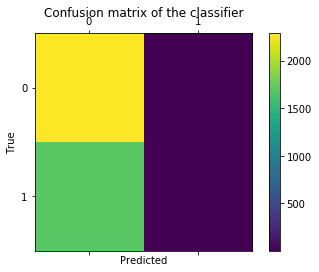

In [40]:
#RF Model Evaluation 
#Validation Score
rfvalpred=rfclf.predict(xval)
valaccuracy = accuracy_score(yval, rfvalpred)
rocval=roc_auc_score(yval, rfvalpred)   #######
#Performance on the Test Set
# Prediction
rfresult = rfclf.predict(xtest)
testaccuracy = accuracy_score(ytest, rfresult)
roctest=roc_auc_score(ytest, rfresult)
confusionmatrix = confusion_matrix(ytest, rfresult)
#Cross Validation
cv5score=cross_val_score(rfclf, scaledfeat, target, cv=5)
cv10score=cross_val_score(rfclf, scaledfeat, target, cv=10)
#CV AUC 
cv5pred=cross_val_predict(rfclf, scaledfeat, target, cv=5)
cv10pred=cross_val_predict(rfclf, scaledfeat, target, cv=10)
cv5roc=roc_auc_score(target, cv5pred)
cv10roc=roc_auc_score(target, cv10pred)
print("========== RF Validation Result  ==========")
print("Validation Accuracy    : ", valaccuracy)
print("ROC    : ", rocval)   ######
print("========== RF Cross Validation Result  ==========")
print("5-fold cross validation Accuracy   : ", cv5score.mean())
print("10-fold cross validation Accuracy  : ", cv10score.mean())
print("5-fold cross AUC   : ", cv5roc)
print("10-fold cross AUC  : ", cv10roc)
print("========== RF Test Result ==========")
print("Test Accuracy    : ", testaccuracy)
print("Test AUC    : ", roctest)
#Confusion Matrix 
print("Confusion Matrix: ")
print(confusionmatrix)
#Show the confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
#Neural Network 
nnclf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(40,), random_state=0,max_iter=1000)                     
# Model Training
nnclf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

==========  NN Validation Result  ==========
Validation Accuracy    :  0.7029166666666666
ROC    :  0.6764044744002419
========== NN Cross Validation Result  ==========
5-fold cross validation    :  0.7024331017085548
10-fold cross validation    :  0.7141822208963753
5-fold cross AUC   :  0.6721040545284437
10-fold cross AUC  :  0.6873085442043082
========== NN Test Result ==========
Test Accuracy    :  0.42625
Test AUC    :  0.5
Confusion Matrix: 
[[   0 2295]
 [   0 1705]]


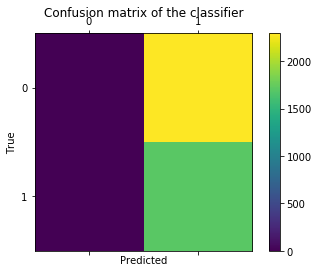

In [43]:
#NN Model Evaluation 
#Validation Score
nnvalpred=nnclf.predict(xval)
valaccuracy = accuracy_score(yval, nnvalpred)
rocval=roc_auc_score(yval, nnvalpred)   #######
#Performance on the Test Set
# Prediction
nnresult = nnclf.predict(xtest)
testaccuracy = accuracy_score(ytest, nnresult)
confusionmatrix = confusion_matrix(ytest, nnresult)
roctest=roc_auc_score(ytest, nnresult)
#Cross Validation
cv5score=cross_val_score(nnclf, scaledfeat, target, cv=5)
cv10score=cross_val_score(nnclf, scaledfeat, target, cv=10)
#CV AUC 
cv5pred=cross_val_predict(nnclf, scaledfeat, target, cv=5)
cv10pred=cross_val_predict(nnclf, scaledfeat, target, cv=10)
cv5roc=roc_auc_score(target, cv5pred)
cv10roc=roc_auc_score(target, cv10pred)
print("==========  NN Validation Result  ==========")
print("Validation Accuracy    : ", valaccuracy)
print("ROC    : ", rocval)   ######
print("========== NN Cross Validation Result  ==========")
print("5-fold cross validation    : ", cv5score.mean())
print("10-fold cross validation    : ", cv10score.mean())
print("5-fold cross AUC   : ", cv5roc)
print("10-fold cross AUC  : ", cv10roc)
print("========== NN Test Result ==========")
print("Test Accuracy    : ", testaccuracy)
print("Test AUC    : ", roctest)
#Confusion Matrix 
print("Confusion Matrix: ")
print(confusionmatrix)
#Show the confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
#Gradient Boosting 
gbclf=GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=4)                 
# Model Training
gbclf.fit(xtrain, ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=4, subsample=1.0, verbose=0,
              warm_start=False)

========== GB Validation Result  ==========
Validation Accuracy    :  0.9808333333333333
ROC    :  0.9777347014991731
========== GB Cross Validation Result  ==========
5-fold cross validation    :  0.9756247441100825
10-fold cross validation    :  0.978249176098311
5-fold cross AUC   :  0.9723538680279934
10-fold cross AUC  :  0.9754907418285755
========== GB Test Result ==========
Test Accuracy    :  0.64875
Test AUC    :  0.5974003156166344
Confusion Matrix: 
[[2170  125]
 [1280  425]]


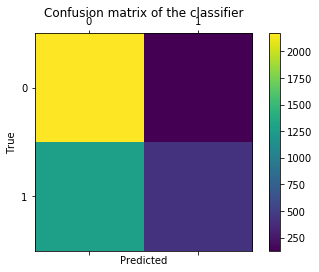

In [45]:
#Gradient Boosting Model Selection
#Validation Score
gbvalpred=gbclf.predict(xval)
valaccuracy = accuracy_score(yval, gbvalpred)
rocval=roc_auc_score(yval, gbvalpred)  
#Performance on the Test Set
# Prediction
gbresult = gbclf.predict(xtest)
testaccuracy = accuracy_score(ytest, gbresult)
confusionmatrix = confusion_matrix(ytest, gbresult)
roctest=roc_auc_score(ytest, gbresult)
#Cross Validation
cv5score=cross_val_score(gbclf, scaledfeat, target, cv=5)
cv10score=cross_val_score(gbclf, scaledfeat, target, cv=10)
#CV AUC 
cv5pred=cross_val_predict(gbclf, scaledfeat, target, cv=5)
cv10pred=cross_val_predict(gbclf, scaledfeat, target, cv=10)
cv5roc=roc_auc_score(target, cv5pred)
cv10roc=roc_auc_score(target, cv10pred)
print("========== GB Validation Result  ==========")
print("Validation Accuracy    : ", valaccuracy)
print("ROC    : ", rocval)   ######
print("========== GB Cross Validation Result  ==========")
print("5-fold cross validation    : ", cv5score.mean())
print("10-fold cross validation    : ", cv10score.mean())
print("5-fold cross AUC   : ", cv5roc)
print("10-fold cross AUC  : ", cv10roc)
print("========== GB Test Result ==========")
print("Test Accuracy    : ", testaccuracy)
print("Test AUC    : ", roctest)
#Confusion Matrix 
print("Confusion Matrix: ")
print(confusionmatrix)
#Show the confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
#SVM 
svmclf = svm.SVC(kernel='linear', C=1, random_state=6)                  
# Model Training
svmclf.fit(xtrain, ytrain)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=6, shrinking=True,
  tol=0.001, verbose=False)

========== SVM Validation Result  ==========
Validation Accuracy    :  0.6579166666666667
ROC    :  0.6045153029467731
========== SVM Cross Validation Result  ==========
5-fold cross validation    :  0.6566866920653508
10-fold cross validation    :  0.6566858841302281
5-fold cross AUC   :  0.6021536788067099
10-fold cross AUC  :  0.6021536788067099
========== SVM Test Result ==========
Test Accuracy    :  0.57375
Test AUC    :  0.5
Confusion Matrix: 
[[2295    0]
 [1705    0]]


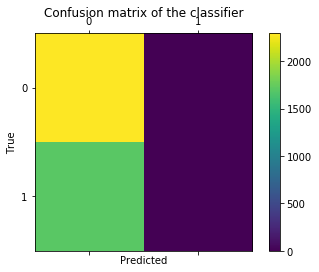

In [47]:
#SVM Model Evaluation 
#Validation Score
svmvalpred=svmclf.predict(xval)
valaccuracy = accuracy_score(yval, svmvalpred)
rocval=roc_auc_score(yval, svmvalpred)  
#Performance on the Test Set
# Prediction
svmresult = svmclf.predict(xtest)
testaccuracy = accuracy_score(ytest, svmresult)
confusionmatrix = confusion_matrix(ytest, svmresult)
roctest=roc_auc_score(ytest, svmresult)
#Cross Validation
cv5score=cross_val_score(svmclf, scaledfeat, target, cv=5)
cv10score=cross_val_score(svmclf, scaledfeat, target, cv=10)
#CV AUC 
cv5pred=cross_val_predict(svmclf, scaledfeat, target, cv=5)
cv10pred=cross_val_predict(svmclf, scaledfeat, target, cv=10)
cv5roc=roc_auc_score(target, cv5pred)
cv10roc=roc_auc_score(target, cv10pred)
print("========== SVM Validation Result  ==========")
print("Validation Accuracy    : ", valaccuracy)
print("ROC    : ", rocval)   ######
print("========== SVM Cross Validation Result  ==========")
print("5-fold cross validation    : ", cv5score.mean())
print("10-fold cross validation    : ", cv10score.mean())
print("5-fold cross AUC   : ", cv5roc)
print("10-fold cross AUC  : ", cv10roc)
print("========== SVM Test Result ==========")
print("Test Accuracy    : ", testaccuracy)
print("Test AUC    : ", roctest)
#Confusion Matrix 
print("Confusion Matrix: ")
print(confusionmatrix)
#Show the confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [48]:
#Ada Boost
adaclf=AdaBoostClassifier(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=8)
# Model Training
adaclf.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=100, random_state=8)

========== ADA Validation Result  ==========
Validation Accuracy    :  0.7604166666666666
ROC    :  0.7226707687930145
========== ADA Cross Validation Result  ==========
5-fold cross validation    :  0.779251994085888
10-fold cross validation    :  0.7619372291014568
5-fold cross AUC   :  0.7558008706537735
10-fold cross AUC  :  0.7240428355913685
========== ADA Test Result ==========
Test Accuracy    :  0.573
Test AUC    :  0.4993464052287582
Confusion Matrix: 
[[2292    3]
 [1705    0]]


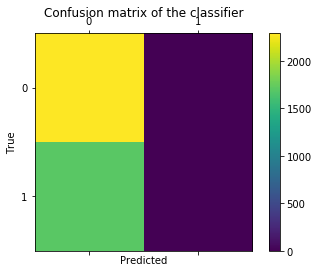

In [49]:
#Ada Model Evaluation 
#Validation Score
adavalpred=adaclf.predict(xval)
valaccuracy = accuracy_score(yval, adavalpred)
rocval=roc_auc_score(yval, adavalpred)  
#Performance on the Test Set
# Prediction
adaresult = adaclf.predict(xtest)
testaccuracy = accuracy_score(ytest, adaresult)
confusionmatrix = confusion_matrix(ytest, adaresult)
roctest=roc_auc_score(ytest, adaresult)
#Cross Validation
cv5score=cross_val_score(adaclf, scaledfeat, target, cv=5)
cv10score=cross_val_score(adaclf, scaledfeat, target, cv=10)
#CV AUC 
cv5pred=cross_val_predict(adaclf, scaledfeat, target, cv=5)
cv10pred=cross_val_predict(adaclf, scaledfeat, target, cv=10)
cv5roc=roc_auc_score(target, cv5pred)
cv10roc=roc_auc_score(target, cv10pred)
print("========== ADA Validation Result  ==========")
print("Validation Accuracy    : ", valaccuracy)
print("ROC    : ", rocval)   ######
print("========== ADA Cross Validation Result  ==========")
print("5-fold cross validation    : ", cv5score.mean())
print("10-fold cross validation    : ", cv10score.mean())
print("5-fold cross AUC   : ", cv5roc)
print("10-fold cross AUC  : ", cv10roc)
print("========== ADA Test Result ==========")
print("Test Accuracy    : ", testaccuracy)
print("Test AUC    : ", roctest)
#Confusion Matrix 
print("Confusion Matrix: ")
print(confusionmatrix)
#Show the confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
#Decision Tree
dtclf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=9, max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None)
# Model Training
dtclf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=9,
            splitter='best')

========== DT Validation Result  ==========
Validation Accuracy    :  0.9816666666666667
ROC    :  0.9809571232949796
========== DT Cross Validation Result  ==========
5-fold cross validation    :  0.9836252136169643
10-fold cross validation    :  0.9859376150146932
5-fold cross AUC   :  0.9829846661025025
10-fold cross AUC  :  0.985507846222487
========== DT Test Result ==========
Test Accuracy    :  0.56475
Test AUC    :  0.5998140800797347
Confusion Matrix: 
[[ 831 1464]
 [ 277 1428]]


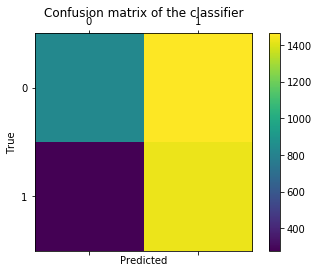

In [52]:
# DT Model Evaluation 
#Validation Score
dtvalpred=dtclf.predict(xval)
valaccuracy = accuracy_score(yval, dtvalpred)
rocval=roc_auc_score(yval, dtvalpred)  
#Performance on the Test Set
# Prediction
dtresult = dtclf.predict(xtest)
testaccuracy = accuracy_score(ytest, dtresult)
confusionmatrix = confusion_matrix(ytest, dtresult)
roctest=roc_auc_score(ytest, dtresult)
#Cross Validation
cv5score=cross_val_score(dtclf, scaledfeat, target, cv=5)
cv10score=cross_val_score(dtclf, scaledfeat, target, cv=10)
#CV AUC 
cv5pred=cross_val_predict(dtclf, scaledfeat, target, cv=5)
cv10pred=cross_val_predict(dtclf, scaledfeat, target, cv=10)
cv5roc=roc_auc_score(target, cv5pred)
cv10roc=roc_auc_score(target, cv10pred)
print("========== DT Validation Result  ==========")
print("Validation Accuracy    : ", valaccuracy)
print("ROC    : ", rocval)   ######
print("========== DT Cross Validation Result  ==========")
print("5-fold cross validation    : ", cv5score.mean())
print("10-fold cross validation    : ", cv10score.mean())
print("5-fold cross AUC   : ", cv5roc)
print("10-fold cross AUC  : ", cv10roc)
print("========== DT Test Result ==========")
print("Test Accuracy    : ", testaccuracy)
print("Test AUC    : ", roctest)
#Confusion Matrix 
print("Confusion Matrix: ")
print(confusionmatrix)
#Show the confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
#KNN 
knnclf=KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
# Model Training
knnclf.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

==========  KNN Validation Result  ==========
Validation Accuracy    :  0.675
ROC    :  0.6626131493304406
========== KNN Cross Validation Result  ==========
5-fold cross validation    :  0.6846875534301811
10-fold cross validation    :  0.6891861237787593
5-fold cross AUC   :  0.6734557221107075
10-fold cross AUC  :  0.6780301187571541
========== KNN Test Result ==========
Test Accuracy    :  0.5295
Test AUC    :  0.48247177658942364
Confusion Matrix: 
[[1839  456]
 [1426  279]]


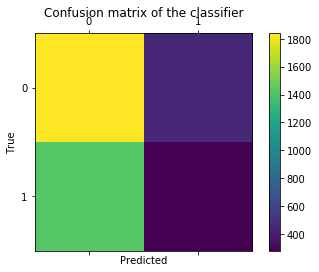

In [55]:
#KNN Model Evaluation 
#Validation Score
knnvalpred=knnclf.predict(xval)
valaccuracy = accuracy_score(yval, knnvalpred)
rocval=roc_auc_score(yval, knnvalpred)  
#Performance on the Test Set
# Prediction
knnresult = knnclf.predict(xtest)
testaccuracy = accuracy_score(ytest, knnresult)
confusionmatrix = confusion_matrix(ytest, knnresult)
roctest=roc_auc_score(ytest, knnresult)
#Cross Validation
cv5score=cross_val_score(knnclf, scaledfeat, target, cv=5)
cv10score=cross_val_score(knnclf, scaledfeat, target, cv=10)
#CV AUC 
cv5pred=cross_val_predict(knnclf, scaledfeat, target, cv=5)
cv10pred=cross_val_predict(knnclf, scaledfeat, target, cv=10)
cv5roc=roc_auc_score(target, cv5pred)
cv10roc=roc_auc_score(target, cv10pred)
print("==========  KNN Validation Result  ==========")
print("Validation Accuracy    : ", valaccuracy)
print("ROC    : ", rocval)   ######
print("========== KNN Cross Validation Result  ==========")
print("5-fold cross validation    : ", cv5score.mean())
print("10-fold cross validation    : ", cv10score.mean())
print("5-fold cross AUC   : ", cv5roc)
print("10-fold cross AUC  : ", cv10roc)
print("========== KNN Test Result ==========")
print("Test Accuracy    : ", testaccuracy)
print("Test AUC    : ", roctest)
#Confusion Matrix 
print("Confusion Matrix: ")
print(confusionmatrix)
#Show the confusion matrix plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusionmatrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()